In [36]:
from sklearn import preprocessing
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

sns.set(style='ticks', color_codes=True)

In [2]:
#Here we are tasked with predicting the income class of US population
#first make a hypothesis
#Hypothesis: an individuals sex, race, age, location, occupaton, and citizenship all influence income level
#White male US citizens in an age range of 30 - 50 living alone the east or west coast will have the highest income

In [3]:
#load data 
traindata = pd.read_csv(r'.\train.csv')
testdata = pd.read_csv(r'.\test.csv')

In [4]:
traindata.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672,-43794.199165
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001,24126.148404
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,-50000.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,-50000.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,-50000.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,-50000.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,50000.000000


In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
age                                 199523 non-null int64
class_of_worker                     199523 non-null object
industry_code                       199523 non-null int64
occupation_code                     199523 non-null int64
education                           199523 non-null object
wage_per_hour                       199523 non-null int64
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_par

In [6]:
#Are there any NAN values in the train data?
traindata.isnull().values.any()

True

In [7]:
#which coolumns have NAN values?
traindata.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary               

In [8]:
#How do we handle the NAN values in the training data set?

In [9]:
#what about the test data set?
testdata.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000
mean,34.628596,15.332812,11.331118,54.461268,425.788577,35.919458,192.494727,1.956156,0.178505,1.519827,23.185331,94.500652
std,22.333449,18.026709,14.459589,270.202643,4616.795578,265.525252,1841.728492,2.364331,0.558316,0.848229,24.389184,0.500002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,95.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9900.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [10]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 41 columns):
age                                 99762 non-null int64
class_of_worker                     99762 non-null object
industry_code                       99762 non-null int64
occupation_code                     99762 non-null int64
education                           99762 non-null object
wage_per_hour                       99762 non-null int64
enrolled_in_edu_inst_lastwk         99762 non-null object
marital_status                      99762 non-null object
major_industry_code                 99762 non-null object
major_occupation_code               99762 non-null object
race                                99762 non-null object
hispanic_origin                     99762 non-null object
sex                                 99762 non-null object
member_of_labor_union               99762 non-null object
reason_for_unemployment             99762 non-null object
full_parttime_employment_

In [11]:
#any null values?
testdata.isnull().values.any()

False

In [12]:
#no Null values in the test data set

In [13]:
#both data sets have categorical and non-categorical data
#we can separate them and explore them to try and get a better understanding ofd the data
cat_train = traindata.select_dtypes(include=['object']).copy()
cat_test = testdata.select_dtypes(include=['object']).copy()
num_train = traindata.select_dtypes(include=['int64']).copy()
num_test = testdata.select_dtypes(include=['int64']).copy()

In [14]:
#double check to see if you separated the data correctly
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 28 columns):
class_of_worker                     199523 non-null object
education                           199523 non-null object
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_parttime_employment_stat       199523 non-null object
tax_filer_status                    199523 non-null object
region_of_previous_residence        199523 non-null object
state_of_previous_residence         198815 non-null object
d_ho

In [15]:
num_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 13 columns):
age                           199523 non-null int64
industry_code                 199523 non-null int64
occupation_code               199523 non-null int64
wage_per_hour                 199523 non-null int64
capital_gains                 199523 non-null int64
capital_losses                199523 non-null int64
dividend_from_Stocks          199523 non-null int64
num_person_Worked_employer    199523 non-null int64
business_or_self_employed     199523 non-null int64
veterans_benefits             199523 non-null int64
weeks_worked_in_year          199523 non-null int64
year                          199523 non-null int64
income_level                  199523 non-null int64
dtypes: int64(13)
memory usage: 19.8 MB


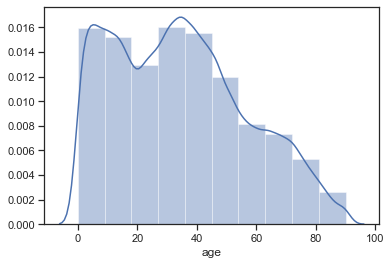

In [16]:
#now explore some of the numerical data
age_train_hist = sns.distplot(num_train['age'], bins= 10)

In [17]:
num_train['age'].value_counts()

34    3489
35    3450
36    3353
31    3351
33    3340
      ... 
85     423
86     348
87     301
88     241
89     195
Name: age, Length: 91, dtype: int64

In [18]:
#how many people are self employed?
num_train['business_or_self_employed'].value_counts()

0    180672
2     16153
1      2698
Name: business_or_self_employed, dtype: int64

In [19]:
num_train['business_or_self_employed'].value_counts(normalize=True)
#what do the three bins represent?

0    0.905520
2    0.080958
1    0.013522
Name: business_or_self_employed, dtype: float64

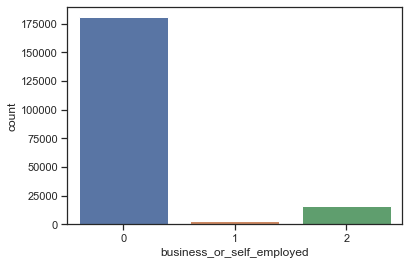

In [20]:
self_employed_train = sns.countplot(num_train['business_or_self_employed'])

In [21]:
#distribution of hourly wage?
num_train['wage_per_hour'].describe()


count    199523.000000
mean         55.426908
std         274.896454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9999.000000
Name: wage_per_hour, dtype: float64

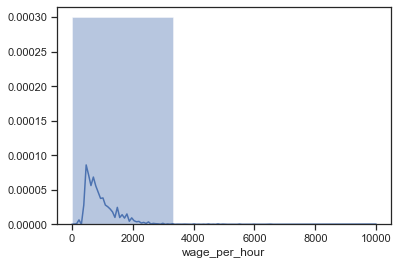

In [22]:
wage_hist = sns.distplot(num_train['wage_per_hour'], bins = 3)

In [23]:
#explore income level
num_train['income_level'].value_counts(normalize=True)

-50000    0.937942
 50000    0.062058
Name: income_level, dtype: float64

In [24]:
#explore categorical values
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 28 columns):
class_of_worker                     199523 non-null object
education                           199523 non-null object
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_parttime_employment_stat       199523 non-null object
tax_filer_status                    199523 non-null object
region_of_previous_residence        199523 non-null object
state_of_previous_residence         198815 non-null object
d_ho

In [25]:
cat_train['sex'].value_counts()

Female    103984
Male       95539
Name: sex, dtype: int64

In [26]:
cat_train['sex'].value_counts(normalize=True)

Female    0.521163
Male      0.478837
Name: sex, dtype: float64

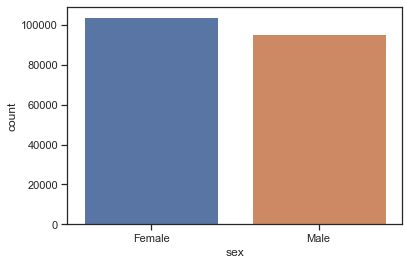

In [27]:
sex_train_hist = sns.countplot(cat_train['sex'])

In [28]:
#what is the race distribution?
cat_train['race'].value_counts()

White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other                            3657
Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64

In [29]:
cat_train['race'].value_counts(normalize=True)

White                          0.838826
Black                          0.102319
Asian or Pacific Islander      0.029245
Other                          0.018329
Amer Indian Aleut or Eskimo    0.011282
Name: race, dtype: float64

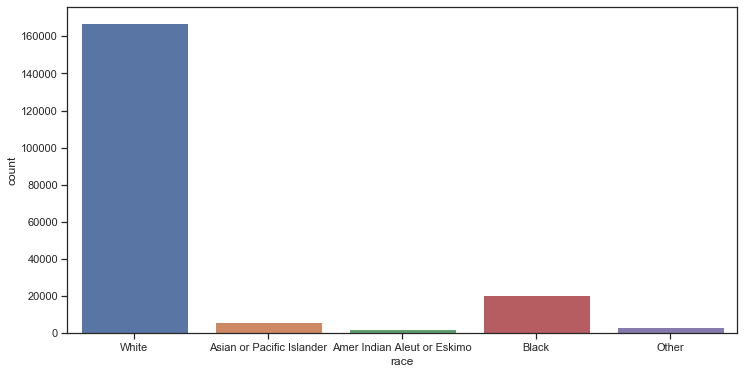

In [39]:
plt.figure(figsize=(12,6))
race_dist = sns.countplot(cat_train['race'])

#x-axis labels are overlappin

In [31]:
cat_train['hispanic_origin'].value_counts()

All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Do not know                     306
Chicano                         304
Name: hispanic_origin, dtype: int64

In [32]:
cat_train['hispanic_origin'].value_counts(normalize = True)

All other                    0.865381
Mexican-American             0.040670
Mexican (Mexicano)           0.036416
Central or South American    0.019607
Puerto Rican                 0.016678
Other Spanish                0.012510
Cuban                        0.005668
Do not know                  0.001540
Chicano                      0.001530
Name: hispanic_origin, dtype: float64

In [33]:
#distribution of education
cat_train['education'].value_counts(normalize = True)

High school graduate                      0.242614
Children                                  0.237677
Some college but no degree                0.139433
Bachelors degree(BA AB BS)                0.099562
7th and 8th grade                         0.040131
10th grade                                0.037875
11th grade                                0.034462
Masters degree(MA MS MEng MEd MSW MBA)    0.032783
9th grade                                 0.031224
Associates degree-occup /vocational       0.026854
Associates degree-academic program        0.021867
5th or 6th grade                          0.016424
12th grade no diploma                     0.010655
1st 2nd 3rd or 4th grade                  0.009017
Prof school degree (MD DDS DVM LLB JD)    0.008986
Doctorate degree(PhD EdD)                 0.006330
Less than 1st grade                       0.004105
Name: education, dtype: float64

In [34]:
num_train['income_level'].value_counts()

-50000    187141
 50000     12382
Name: income_level, dtype: int64

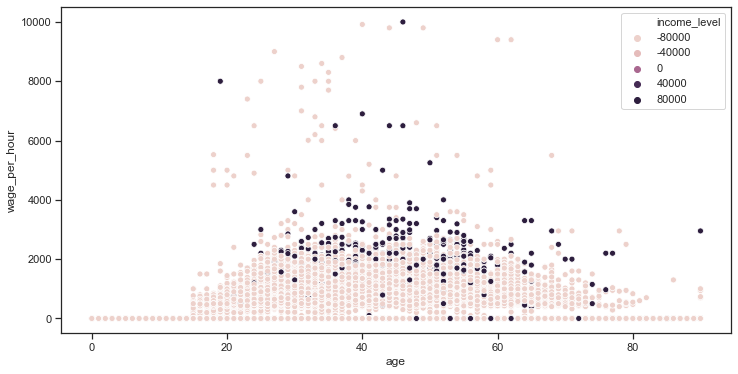

In [43]:
#Now lets start to plot some of the numerical values with the dependant variable
#will allow us to determine if clusters are present
plt.figure(figsize=(12,6))
age_hourly_wage_income = sns.scatterplot(num_train['age'], num_train['wage_per_hour'], hue= num_train['income_level'])

In [44]:
#Fix key on chart. There should only be 2 values -50k and +50k
#What does the scatter chart tell us? 
#we can see only two colors beige that represents -5000 level, and black wich is +5000
#most black dots are at the age range 30 to 80, meaning that these individuals are making more the 50K annually
#Knowing that this is a binary classification problem will tells us that we might want to make two bins for age later

#We can see that most individuals make an hourly wage of less than 3000. What units are these values in?


In [48]:
#contiue to plot numerical variables against the dependent variable of annual income

list(num_train.columns.values)

['age',
 'industry_code',
 'occupation_code',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'dividend_from_Stocks',
 'num_person_Worked_employer',
 'business_or_self_employed',
 'veterans_benefits',
 'weeks_worked_in_year',
 'year',
 'income_level']

In [59]:
num_train['occupation_code'].value_counts()

0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
12      3340
33      3325
3       3195
35      3168
38      3003
31      2699
32      2398
37      2234
8       2151
42      1918
30      1897
24      1847
17      1771
28      1661
44      1592
41      1592
43      1382
4       1364
13      1271
18      1083
39      1017
14       932
5        855
15       815
27       780
25       767
9        738
7        731
11       637
40       617
1        544
21       533
6        441
22       411
45       172
20        71
46        36
Name: occupation_code, dtype: int64

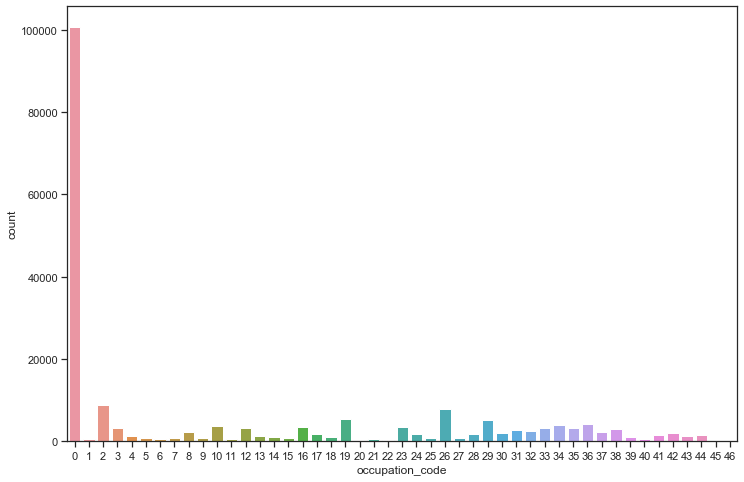

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(num_train['occupation_code'])

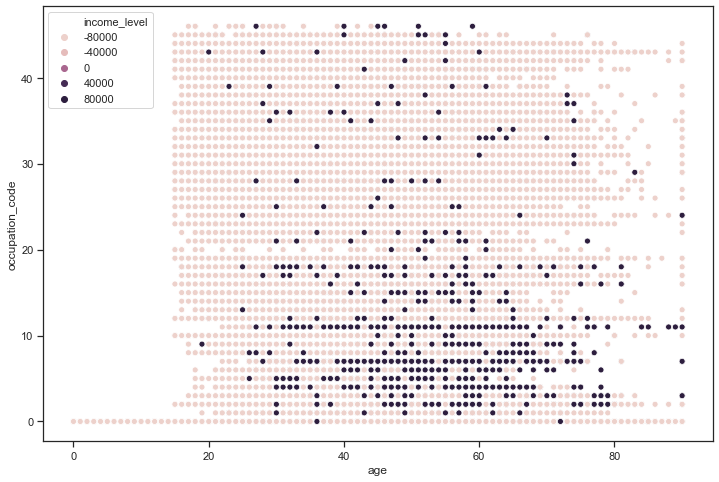

In [60]:
#let's explore capital gains vs year color coded by income level
plt.figure(figsize=(12,8))
occupation_age_income = sns.scatterplot(num_train['age'], num_train['occupation_code'], hue=num_train['income_level'])

In [64]:
#Here we can see tha ta mjority of the job codes that earn +50k annually are below 20
#individuals of age 30-80 are have most of the occupation codes that allow them to make +50k annually (blakcdots)
#

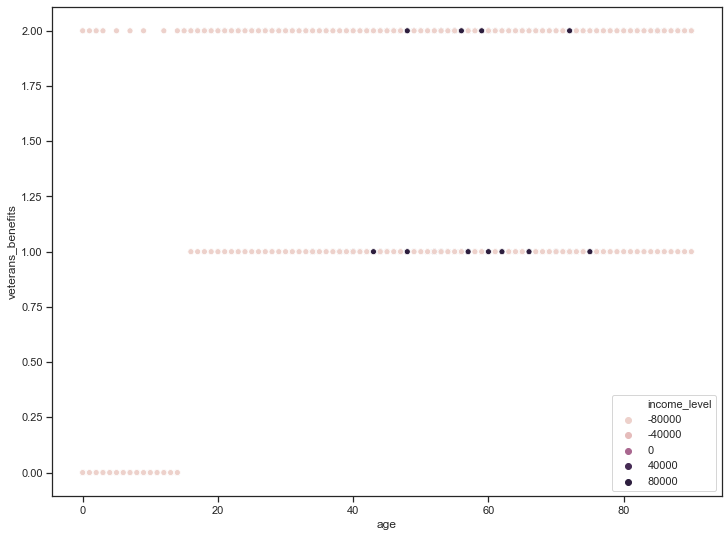

In [80]:
plt.figure(figsize=(12,9))
vet_age_income = sns.scatterplot(num_train['age'], num_train['veterans_benefits'], num_train['income_level'])


In [81]:
#Here there seems to be a relationship with the veteran benefits with age
#No one over the age of 18 has veteran benefits 1 or 2
#those that have an annual income of +50k are all between ages of 40 and 80 and have veteran benefits sataus 1 or 2


In [82]:
list(num_train)

['age',
 'industry_code',
 'occupation_code',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'dividend_from_Stocks',
 'num_person_Worked_employer',
 'business_or_self_employed',
 'veterans_benefits',
 'weeks_worked_in_year',
 'year',
 'income_level']

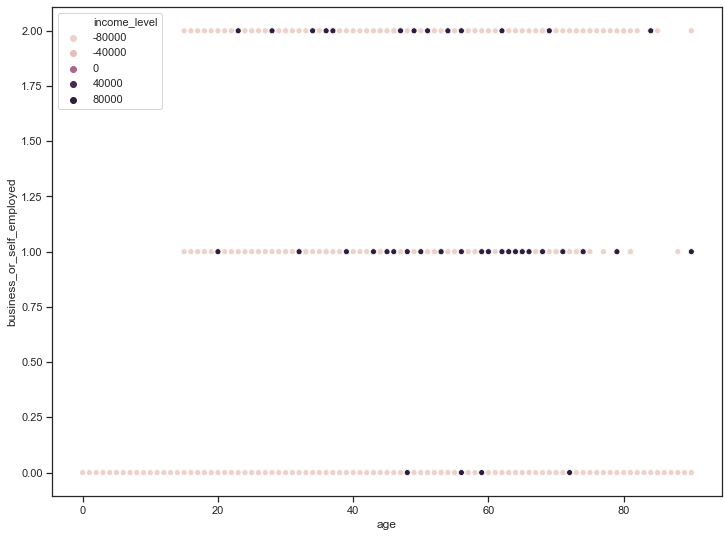

In [86]:
#explore selfemplyed vs not, age and income level
plt.figure(figsize=(12,9))
self_age_income = sns.scatterplot(num_train['age'], num_train['business_or_self_employed'], num_train['income_level'])

In [87]:
#Here the data suggests that no idividual under 18 years old is status 0
#most individuals making +50k annually are in status 1 or 2
#within status 1 most +50k earners are 45-70 years old
#the fewest number of +50k earners are in status 0 and are between ages of 50 and 70


In [88]:
#Now we can explore some of the categorical relationships

list(cat_train)

['class_of_worker',
 'education',
 'enrolled_in_edu_inst_lastwk',
 'marital_status',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_labor_union',
 'reason_for_unemployment',
 'full_parttime_employment_stat',
 'tax_filer_status',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'd_household_family_stat',
 'd_household_summary',
 'migration_msa',
 'migration_reg',
 'migration_within_reg',
 'live_1_year_ago',
 'migration_sunbelt',
 'family_members_under_18',
 'country_father',
 'country_mother',
 'country_self',
 'citizenship',
 'fill_questionnaire_veteran_admin']

[Text(0, 0, 'Not in universe'),
 Text(0, 0, 'Self-employed-not incorporated'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Local government'),
 Text(0, 0, 'Federal government'),
 Text(0, 0, 'Self-employed-incorporated'),
 Text(0, 0, 'State government'),
 Text(0, 0, 'Never worked'),
 Text(0, 0, 'Without pay')]

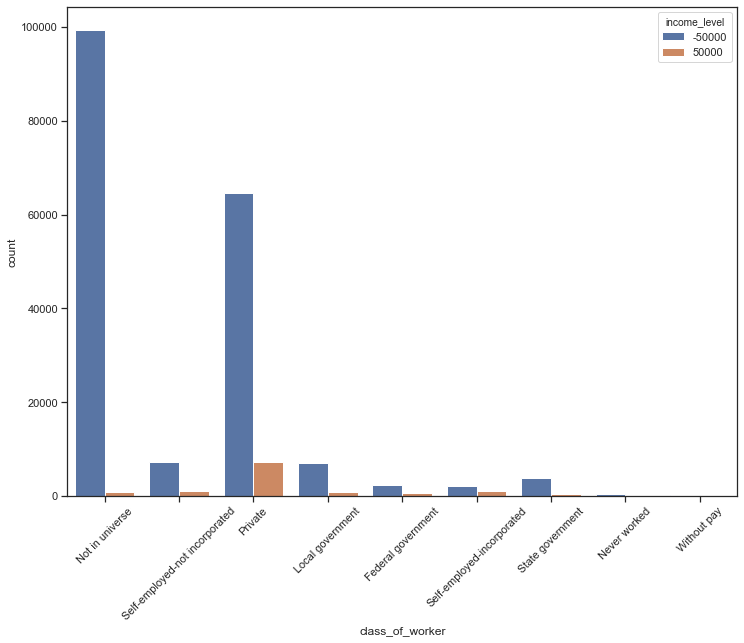

In [96]:
plt.figure(figsize=(12,9))
workerClass_income = sns.countplot(cat_train['class_of_worker'], hue =num_train['income_level'], dodge=True)
workerClass_income.set_xticklabels(workerClass_income.get_xticklabels(), rotation=45) 

In [97]:
#This chart suggests that most people not in univerity are making -50k
#About 62000 people in the private sector are making -50k annually


[Text(0, 0, 'White'),
 Text(0, 0, 'Asian or Pacific Islander'),
 Text(0, 0, 'Amer Indian Aleut or Eskimo'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Other')]

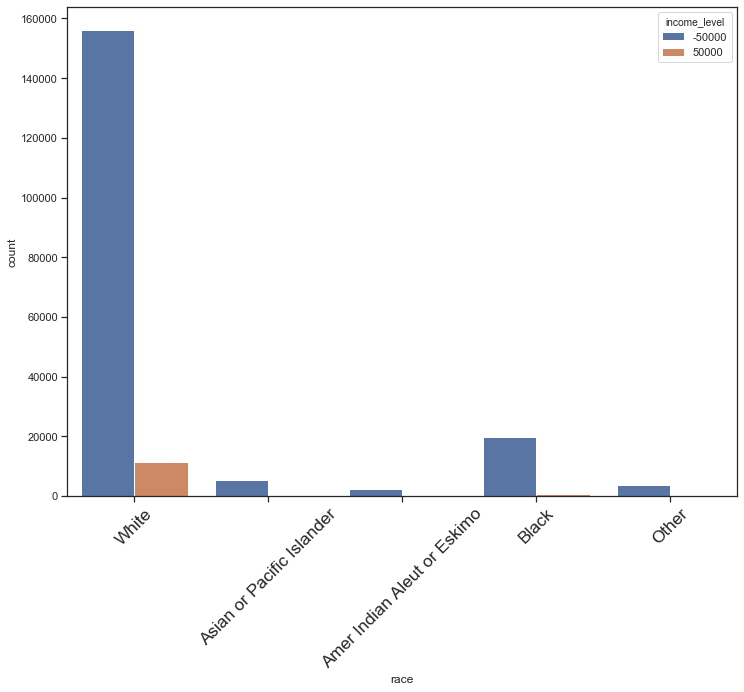

In [102]:
plt.figure(figsize=(12,9))
race_income = sns.countplot(cat_train['race'], hue = num_train['income_level'])
race_income.set_xticklabels(race_income.get_xticklabels(), rotation=45, fontsize='x-large')

In [103]:
#This chart is very interesting and suggests that the "white race" is the only race making +50k annually
#if you look at cat_train['race']value_counts() we can see that some black people do infact make +50k
#this chart also suggests that most people included in the cencus are white
# how is the distribution for hispanics?

[Text(0, 0, 'All other'),
 Text(0, 0, 'Do not know'),
 Text(0, 0, 'Central or South American'),
 Text(0, 0, 'Mexican (Mexicano)'),
 Text(0, 0, 'Mexican-American'),
 Text(0, 0, 'Other Spanish'),
 Text(0, 0, 'Puerto Rican'),
 Text(0, 0, 'Cuban'),
 Text(0, 0, 'Chicano')]

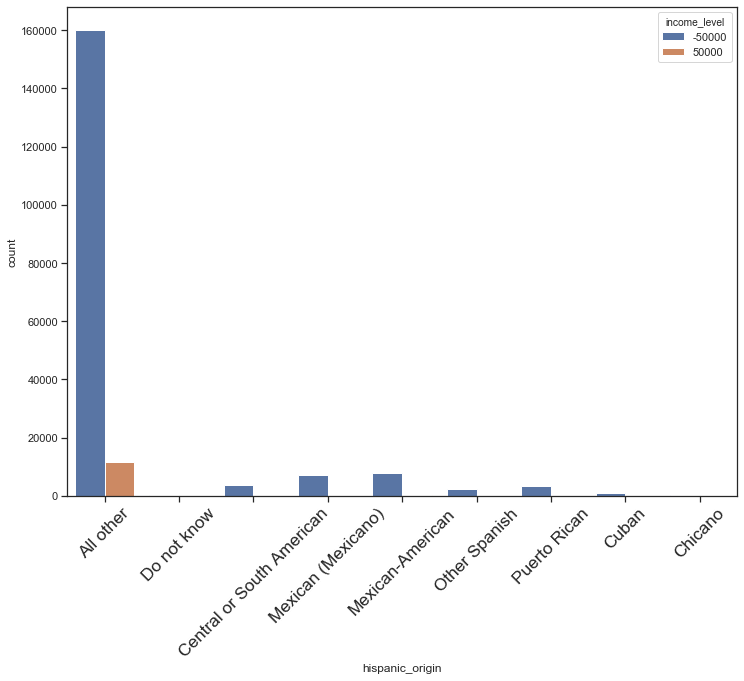

In [106]:
plt.figure(figsize=(12,9))
hispanic_income = sns.countplot(cat_train['hispanic_origin'], hue = num_train['income_level'])
hispanic_income.set_xticklabels(hispanic_income.get_xticklabels(), rotation = 45, fontsize='x-large')

In [107]:
#this chart suggests that most hispanic outside of the "all other" category don't make +50k annually
#most hispanics in this census identify as "all other"


In [ ]:
#is there a correlation between sex and income?
plt.